In [1]:
import sys
sys.path.append('../03-code/')
import pandas as pd

#from model_training_helper import *
from config import PROJECT_ROOT_DIRECTORY, COLUMNS_DICT, IDENTIFIER_DICT

In [2]:
# read the energy level alignment data and formability decision data iteratively from generation 0 to 4
combined_practicality_dataframe = pd.DataFrame()
for i in range(0,7):
    fingerprint_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/01-molecular-generation/fingerprints/fingerprints_generation_' + str(i) + '.csv'
    fingerprint_dataframe = pd.read_csv(fingerprint_csv)

    mo_prediction_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/01-molecular-generation/mo-prediction/mo_prediction_generation_' + str(i) + '.csv'
    energy_level_alignment_dataframe = pd.read_csv(mo_prediction_csv)

    practicality_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/15-practicality-processability/practicality_generation_' + str(i) + '.csv'   
    practicality_dataframe = pd.read_csv(practicality_csv)[['smiles_canonical', 'PubChem_existence', 'LogP', 'SAScore']]

    combined_dataframe = pd.merge(fingerprint_dataframe, practicality_dataframe, on='smiles_canonical', how='left')
    combined_dataframe = pd.merge(combined_dataframe, energy_level_alignment_dataframe, on='smiles_canonical', how='left')
    combined_dataframe['generation'] = i
    combined_practicality_dataframe = pd.concat([combined_practicality_dataframe, combined_dataframe], axis=0, ignore_index=True)

In [3]:
combined_practicality_dataframe

,smiles_canonical,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,fluorination,furan,pyrrole,sidechain_on_linker,sidechain_on_backbone,PubChem_existence,LogP,SAScore,HOMO_prediction,LUMO_prediction,alignment_type_prediction,generation
0,[NH3+]Cc1ccc(C[NH3+])cc1,1,0.0,1.0,2,2,1.0,0,0,0,0,0,0,True,0.60400,1.656183,-14.061553,-8.278843,Ia,0
1,[NH3+]Cc1ccc(C[NH3+])s1,1,0.0,0.0,2,2,1.0,0,0,0,0,0,0,True,0.66550,2.587410,-14.089461,-8.384832,Ia,1
2,[NH3+]Cc1csc(C[NH3+])c1,1,0.0,0.0,2,2,1.0,0,0,0,0,0,0,True,0.66550,2.715514,-14.089461,-8.384832,Ia,1
3,[NH3+]Cc1ccc(-c2ccc(C[NH3+])cc2)cc1,2,1.0,1.0,2,2,1.0,0,0,0,0,0,0,True,2.27100,1.503879,-12.115045,-6.905807,Ia,1
4,[NH3+]Cc1ccc(-c2csc(C[NH3+])c2)cc1,2,1.0,0.5,2,2,1.0,0,0,0,0,0,0,False,2.33250,2.161802,-12.128999,-6.958801,Ia,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887095,Cc1c(F)c(C(C)[NH3+])c(C)c(F)c1C(C)[NH3+],1,0.0,1.0,2,2,1.0,0,2,0,0,2,2,False,2.62104,3.745485,-13.342070,-7.949911,Ia,6
4887096,Cc1c(F)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],1,0.0,1.0,2,2,1.0,0,2,0,0,2,2,False,2.62104,3.715248,-13.342070,-7.949911,Ia,6
4887097,Cc1c(C)c(C(C)[NH3+])c(F)c(F)c1C(C)[NH3+],1,0.0,1.0,2,2,1.0,0,2,0,0,2,2,False,2.62104,3.576063,-13.342070,-7.949911,Ia,6
4887098,Cc1c(C)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],1,0.0,1.0,2,2,1.0,0,1,0,0,2,3,False,2.79036,3.571210,-13.103808,-7.699485,Ia,6


In [16]:
combined_practicality_dataframe.query('generation <=6 and linkage_p == 0 and six_ring_p == 1 and alignment_type_prediction == "Ib"')

,smiles_canonical,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,fluorination,furan,pyrrole,sidechain_on_linker,sidechain_on_backbone,PubChem_existence,LogP,SAScore,HOMO_prediction,LUMO_prediction,alignment_type_prediction,generation
30129,[NH3+]Cc1ccc2cc3cc4cc5cc(C[NH3+])ccc5cc4cc3cc2c1,5,0.0,1.0,2,2,1.0,0,0,0,0,0,0,False,5.2168,2.122427,-8.715831,-6.142678,Ib,4
30130,[NH3+]Cc1ccc2cc3cc4c(ccc5cc(C[NH3+])ccc54)cc3c...,5,0.0,1.0,2,2,1.0,0,0,0,0,0,0,False,5.2168,2.264706,-8.715831,-6.142678,Ib,4
30154,[NH3+]Cc1ccc2cc3c(ccc4c5ccc(C[NH3+])cc5ccc34)c...,5,0.0,1.0,2,2,1.0,0,0,0,0,0,0,False,5.2168,2.216729,-8.715831,-6.142678,Ib,4
30155,[NH3+]Cc1ccc2cc3c(ccc4cc5cc(C[NH3+])ccc5cc43)c...,5,0.0,1.0,2,2,1.0,0,0,0,0,0,0,False,5.2168,2.196334,-8.715831,-6.142678,Ib,4
30156,[NH3+]Cc1ccc2c(ccc3cc4c(ccc5cc(C[NH3+])ccc54)c...,5,0.0,1.0,2,2,1.0,0,0,0,0,0,0,False,5.2168,2.115375,-8.715831,-6.142678,Ib,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373887,[NH3+]Cc1ccc2c(ccc3c4cc(F)c(C[NH3+])nc4ccc23)n1,4,0.0,1.0,2,2,1.0,2,1,0,0,0,0,False,2.9927,2.512247,-10.661821,-7.547815,Ib,6
4373888,[NH3+]Cc1ccc2c(ccc3c2ccc2nc(C[NH3+])cc(F)c23)n1,4,0.0,1.0,2,2,1.0,2,1,0,0,0,0,False,2.9927,2.633370,-10.661821,-7.547815,Ib,6
4373889,[NH3+]Cc1ccc2c(ccc3c4ccc(C[NH3+])nc4c(F)cc23)n1,4,0.0,1.0,2,2,1.0,2,1,0,0,0,0,False,2.9927,2.527663,-10.661821,-7.547815,Ib,6
4373890,[NH3+]Cc1ccc2c(cc(F)c3c4ccc(C[NH3+])nc4ccc23)n1,4,0.0,1.0,2,2,1.0,2,1,0,0,0,0,False,2.9927,2.592360,-10.661821,-7.547815,Ib,6


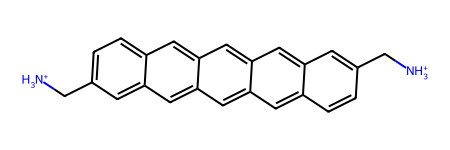

In [33]:
from rdkit import Chem
Chem.MolFromSmiles('[NH3+]Cc1ccc2cc3cc4cc5cc(C[NH3+])ccc5cc4cc3cc2c1')
Chem.MolFromSmiles('[NH3+]Cc1ccc2cc3cc4cc5cc(C[NH3+])ccc5cc4cc3cc2c1')

In [94]:
organic_genome_dataframe = pd.read_csv(
    PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/01-organic-genome.csv', index_col='identifier'
)
organic_genome_dataframe

,smiles_canonical,generation
identifier,,
1,[NH3+]Cc1cc2sc(C[NH3+])cc2s1,2.0
2,[NH3+]Cc1cc2sc([NH3+])cc2s1,3.0
3,[NH3+]c1cc2sc([NH3+])cc2s1,4.0
4,[NH3+]Cc1ccc(C[NH3+])s1,1.0
5,[NH3+]Cc1ccc(C[NH3+])o1,2.0
...,...,...
40605,[NH3+]Cc1ccc2nc(-c3cs[nH+]n3)[nH]c2c1,6.0
40606,[NH3+]Cc1ccc2nc(-c3cn[nH+]s3)[nH]c2c1,6.0
40607,Cc1c[nH+]nc2oc(C[NH3+])nc12,6.0


In [95]:
new_dataframe = pd.merge(organic_genome_dataframe.drop(columns=['generation']).reset_index(), combined_practicality_dataframe, on='smiles_canonical', how='left').set_index('identifier')

In [96]:
new_dataframe.loc[IDENTIFIER_DICT['existing']]

,smiles_canonical,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,fluorination,furan,pyrrole,sidechain_on_linker,sidechain_on_backbone,PubChem_existence,LogP,SAScore,HOMO_prediction,LUMO_prediction,alignment_type_prediction,generation
identifier,,,,,,,,,,,,,,,,,,,,
1,[NH3+]Cc1cc2sc(C[NH3+])cc2s1,2.0,0.0,0.0,2.0,2.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,False,1.8802,3.017987,-12.753030,-7.850791,Ia,2.0
4,[NH3+]Cc1ccc(C[NH3+])s1,1.0,0.0,0.0,2.0,2.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,True,0.6655,2.587410,-14.089461,-8.384832,Ia,1.0
11,[NH3+]Cc1ccc[nH+]c1,1.0,0.0,1.0,1.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,True,0.5403,1.792884,-15.947470,-10.631970,Ia,2.0
26,[NH3+]Cc1ccc(C[NH3+])cc1,1.0,0.0,1.0,2.0,2.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,True,0.6040,1.656183,-14.061553,-8.278843,Ia,0.0
37,[NH3+]Cc1cc[nH+]cc1,1.0,0.0,1.0,1.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,True,0.5403,1.829413,-15.912665,-10.644682,Ia,1.0
56,[NH3+]c1ccc([NH3+])cc1,1.0,0.0,1.0,2.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,True,0.8510,1.668224,-15.114441,-9.289912,Ia,2.0
59,[NH3+]c1cccc([NH3+])c1,1.0,0.0,1.0,2.0,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,True,0.8510,1.766979,-15.149246,-9.277200,Ia,3.0
60,[NH3+]Cc1c(F)c(F)c(C[NH3+])c(F)c1F,1.0,0.0,1.0,2.0,2.0,1.000000,0.0,4.0,0.0,0.0,0.0,0.0,True,1.1604,2.704338,-14.061553,-8.718889,Ia,4.0
100,[NH3+]Cc1ccc(-c2ccc(C[NH3+])s2)s1,2.0,1.0,0.0,2.0,2.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,True,2.3940,2.614829,-12.142953,-7.011796,Ia,2.0


In [97]:
import numpy as np
df = new_dataframe.copy()
# calculate processability score: higher LogP and 
df['pubchem_score'] = df["PubChem_existence"].astype(float)
    
# --- LogP score ---
# Ideal range: -0.891 to 4.9
# Use a smooth transition using a logistic-like function
def smooth_logp(x):
    center_low, center_high = -0.891, 5.94
    # smooth step using sigmoid for both boundaries
    s_low = 1 / (1 + np.exp(-5 * (x - center_low)))   # goes from 0 to 1
    s_high = 1 / (1 + np.exp(5 * (x - center_high)))  # goes from 1 to 0
    return s_low * s_high  # combine both boundaries
    
df['logp_score'] = df["LogP"].apply(smooth_logp)
    
# --- SAscore ---
# If value < 3.08 → good, else worse
def smooth_sa(x):
    threshold = 3.08
    return 1 / (1 + np.exp(10 * (x - threshold)))  # smooth drop after 3.08
    
df['sa_score'] = df["SAScore"].apply(smooth_sa)
    
# --- Final score: average of three ---
df["Final_score"] = (df['pubchem_score'] + df['logp_score'] + df['sa_score']) / 3

In [98]:
df

,smiles_canonical,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,fluorination,furan,...,LogP,SAScore,HOMO_prediction,LUMO_prediction,alignment_type_prediction,generation,pubchem_score,logp_score,sa_score,Final_score
identifier,,,,,,,,,,,,,,,,,,,,,
1,[NH3+]Cc1cc2sc(C[NH3+])cc2s1,2.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,...,1.8802,3.017987,-12.753030,-7.850791,Ia,2.0,0.0,0.999999,0.650249,0.550083
2,[NH3+]Cc1cc2sc([NH3+])cc2s1,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,...,2.0037,3.193146,-13.279474,-8.356325,Ia,3.0,0.0,0.999999,0.243891,0.414630
3,[NH3+]c1cc2sc([NH3+])cc2s1,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,...,2.1272,3.411628,-13.805918,-8.861860,Ia,4.0,1.0,1.000000,0.035017,0.678339
4,[NH3+]Cc1ccc(C[NH3+])s1,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,...,0.6655,2.587410,-14.089461,-8.384832,Ia,1.0,1.0,0.999583,0.992796,0.997460
5,[NH3+]Cc1ccc(C[NH3+])o1,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,...,0.1970,2.519857,-14.048490,-8.365982,Ia,2.0,1.0,0.995679,0.996321,0.997333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40605,[NH3+]Cc1ccc2nc(-c3cs[nH+]n3)[nH]c2c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40606,[NH3+]Cc1ccc2nc(-c3cn[nH+]s3)[nH]c2c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40607,Cc1c[nH+]nc2oc(C[NH3+])nc12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='LogP', ylabel='logp_score'>

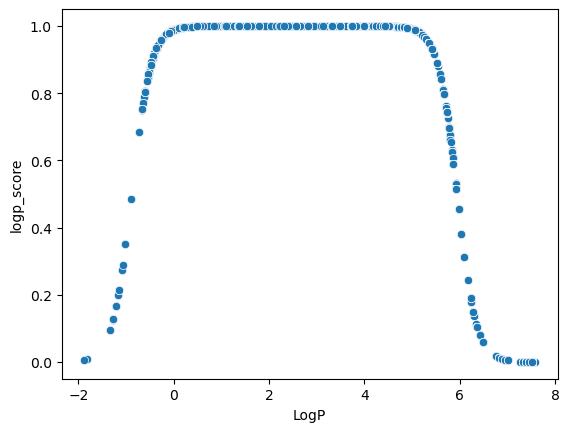

In [63]:
import seaborn as sns

sns.scatterplot(data=df, x='LogP', y='logp_score')

<Axes: xlabel='SAScore', ylabel='sa_score'>

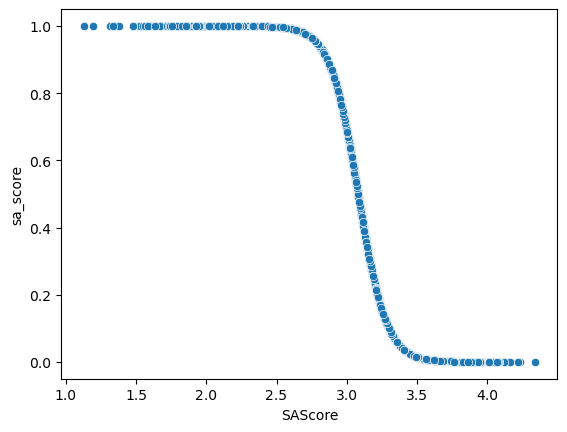

In [64]:
sns.scatterplot(data=df, x='SAScore', y='sa_score')

In [65]:
df.loc[IDENTIFIER_DICT['existing']]

,smiles_canonical,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,fluorination,furan,...,sidechain_on_linker,sidechain_on_backbone,PubChem_existence,LogP,SAScore,generation,pubchem_score,logp_score,sa_score,Final_score
identifier,,,,,,,,,,,,,,,,,,,,,
1,[NH3+]Cc1cc2sc(C[NH3+])cc2s1,2.0,0.0,0.0,2.0,2.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,False,1.8802,3.017987,2.0,0.0,0.999999,0.650249,0.550083
4,[NH3+]Cc1ccc(C[NH3+])s1,1.0,0.0,0.0,2.0,2.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,True,0.6655,2.587410,1.0,1.0,0.999583,0.992796,0.997460
11,[NH3+]Cc1ccc[nH+]c1,1.0,0.0,1.0,1.0,1.0,0.666667,0.0,0.0,0.0,...,0.0,0.0,True,0.5403,1.792884,2.0,1.0,0.999221,0.999997,0.999739
26,[NH3+]Cc1ccc(C[NH3+])cc1,1.0,0.0,1.0,2.0,2.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,True,0.6040,1.656183,0.0,1.0,0.999433,0.999999,0.999811
37,[NH3+]Cc1cc[nH+]cc1,1.0,0.0,1.0,1.0,1.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,True,0.5403,1.829413,1.0,1.0,0.999221,0.999996,0.999739
56,[NH3+]c1ccc([NH3+])cc1,1.0,0.0,1.0,2.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,True,0.8510,1.668224,2.0,1.0,0.999835,0.999999,0.999945
59,[NH3+]c1cccc([NH3+])c1,1.0,0.0,1.0,2.0,0.0,0.666667,0.0,0.0,0.0,...,0.0,0.0,True,0.8510,1.766979,3.0,1.0,0.999835,0.999998,0.999944
60,[NH3+]Cc1c(F)c(F)c(C[NH3+])c(F)c1F,1.0,0.0,1.0,2.0,2.0,1.000000,0.0,4.0,0.0,...,0.0,0.0,True,1.1604,2.704338,4.0,1.0,0.999965,0.977171,0.992379
100,[NH3+]Cc1ccc(-c2ccc(C[NH3+])s2)s1,2.0,1.0,0.0,2.0,2.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,True,2.3940,2.614829,2.0,1.0,1.000000,0.990545,0.996848


In [100]:
df.loc[200,'Final_score']

0.6579149098224272

<Axes: xlabel='Final_score', ylabel='Count'>

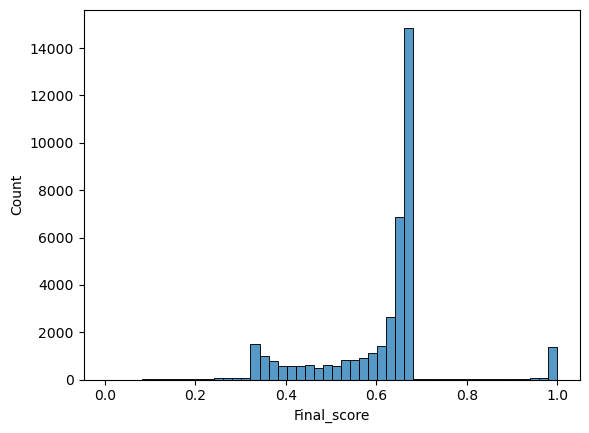

In [99]:
sns.histplot(data=df, x='Final_score', bins=50)

In [104]:
df.query('alignment_type_prediction == "Ib" and ringcount >= 5 and linkage_p == 0')

,smiles_canonical,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,fluorination,furan,...,LogP,SAScore,HOMO_prediction,LUMO_prediction,alignment_type_prediction,generation,pubchem_score,logp_score,sa_score,Final_score
identifier,,,,,,,,,,,,,,,,,,,,,
200,[NH3+]Cc1ccc2cc3cc4cc5cc(C[NH3+])ccc5cc4cc3cc2c1,5.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,...,5.2168,2.122427,-8.715831,-6.142678,Ib,4.0,0.0,0.973814,0.999931,0.657915
209,[NH3+]Cc1ccc2c(ccc3c2ccc2c4ccc(C[NH3+])cc4ccc2...,5.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,...,5.2168,1.994140,-8.715831,-6.142678,Ib,4.0,0.0,0.973814,0.999981,0.657932
232,[NH3+]Cc1ccc2cc3cc4cc5cc(C[NH3+])sc5cc4cc3cc2c1,5.0,0.0,0.8,2.0,2.0,1.0,0.0,0.0,0.0,...,5.2783,2.648259,-8.721412,-6.163876,Ib,4.0,0.0,0.964719,0.986841,0.650520
233,[NH3+]Cc1cc2cc3cc4cc5sc(C[NH3+])cc5cc4cc3cc2s1,5.0,0.0,0.6,2.0,2.0,1.0,0.0,0.0,0.0,...,5.3398,2.853142,-8.726994,-6.185074,Ib,4.0,0.0,0.952619,0.906241,0.619620
243,[NH3+]Cc1cc2sc3c(sc4c5sc(C[NH3+])cc5sc43)c2s1,5.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,...,5.5243,3.490401,-8.743738,-6.248667,Ib,5.0,0.0,0.888796,0.016238,0.301678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32498,[NH3+]Cc1ccc2c(c1)sc1c2sc2c3ccc(C[NH3+])cc3sc21,5.0,0.0,0.4,2.0,2.0,1.0,0.0,0.0,0.0,...,5.4013,2.804132,-8.732575,-6.206272,Ib,4.0,0.0,0.936642,0.940402,0.625681
32499,[NH3+]Cc1ccc2c(c1)sc1c2sc2c3sc(C[NH3+])cc3sc21,5.0,0.0,0.2,2.0,2.0,1.0,0.0,0.0,0.0,...,5.4628,3.129681,-8.738157,-6.227470,Ib,4.0,0.0,0.915753,0.378291,0.431348
36250,[NH3+]Cc1ccc2c(c1)sc1cc3c(cc12)sc1cc([NH3+])ccc13,5.0,0.0,0.6,2.0,1.0,1.0,0.0,0.0,0.0,...,5.4633,2.592532,-9.253438,-6.690609,Ib,5.0,1.0,0.915560,0.992420,0.969327


In [86]:
inverse_design_dataframe = pd.read_csv(
    PROJECT_ROOT_DIRECTORY + '01-rawdata/19-inverse-design/type_IIb/type_IIb_selected_candidates.csv'
)
inverse_design_dataframe

,smiles_canonical,Sequence,generation,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,...,alignment_type_prediction,STEI,NumRot_tail,eccentricity,disNN,formability_score,smiles_neutral,iupac_name,cid,PubChem_existence
0,[NH3+]Cc1cc[nH+]cn1,"[9, 12]",2,1.0,0.0,1.0,1.0,1.0,1.000000,1.0,...,IIb,2.310662,1.0,5.0,0.040000,0.983261,NCc1ccncn1,pyrimidin-4-ylmethanamine,12933348.0,True
1,[NH3+]Cc1cc[nH+]nc1,"[9, 12]",2,1.0,0.0,1.0,1.0,1.0,1.000000,1.0,...,IIb,2.310662,1.0,5.0,0.040000,0.983261,NCc1ccnnc1,pyridazin-4-ylmethanamine,15034997.0,True
2,[NH3+]Cc1nc[nH+]s1,"[1, 9, 12]",3,1.0,0.0,0.0,1.0,1.0,1.000000,1.0,...,IIb,2.302662,1.0,4.0,0.062500,0.965091,NCc1ncns1,"1,2,4-thiadiazol-5-ylmethanamine",82418955.0,True
3,[NH3+]Cc1cn[nH+]s1,"[1, 9, 12]",3,1.0,0.0,0.0,1.0,1.0,1.000000,1.0,...,IIb,2.302662,1.0,4.0,0.062500,0.965091,NCc1cnns1,thiadiazol-5-ylmethanamine,54534495.0,True
4,[NH3+]Cc1n[nH+]cs1,"[2, 9, 12]",3,1.0,0.0,0.0,1.0,1.0,1.000000,1.0,...,IIb,2.302662,1.0,4.0,0.062500,0.965091,NCc1nncs1,"1,3,4-thiadiazol-2-ylmethanamine",21843659.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,CC(C[NH3+])Cc1nnn[nH+]n1,"[8, 9, 10, 10, 12, 12, 12, 12, 16]",9,1.0,0.0,1.0,1.0,3.0,0.666667,4.0,...,IIb,2.360329,2.0,6.0,0.027778,0.978216,CC(CN)Cc1nnnnn1,NaN,NaN,False
177,CC(CC[NH3+])c1nnn[nH+]n1,"[8, 9, 10, 10, 12, 12, 12, 12, 16]",9,1.0,0.0,1.0,1.0,3.0,0.666667,4.0,...,IIb,2.367954,2.0,6.0,0.027778,0.968777,CC(CCN)c1nnnnn1,NaN,NaN,False
178,CC([NH3+])C(C)c1nnn[nH+]n1,"[8, 9, 10, 12, 12, 12, 12, 16, 16]",9,1.0,0.0,1.0,1.0,2.0,0.666667,4.0,...,IIb,2.371324,1.5,5.0,0.040000,0.963166,CC(N)C(C)c1nnnnn1,NaN,NaN,False
179,CC([NH3+])C(C)c1n[nH+]nc(F)n1,"[8, 9, 10, 12, 12, 12, 15, 16, 16]",9,1.0,0.0,1.0,1.0,2.0,0.666667,3.0,...,IIb,2.408361,1.5,5.0,0.040000,0.874288,CC(N)C(C)c1nnnc(F)n1,NaN,NaN,False


In [87]:
from organic_featurization_helper import get_neutral_smiles
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import RDConfig
import os
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
# now you can import sascore!
import sascorer

for idx, row in inverse_design_dataframe.iterrows():

    smiles_canonical = row['smiles_canonical']
    smiles_neutral = get_neutral_smiles(smiles_canonical)

    neutral_mol = Chem.MolFromSmiles(smiles_neutral)

    logP = Descriptors.MolLogP(neutral_mol)

    sascore_value = sascorer.calculateScore(neutral_mol)

    inverse_design_dataframe.at[idx, 'LogP'] = logP
    inverse_design_dataframe.at[idx, 'SAScore'] = sascore_value

In [54]:
sascorer.calculateScore(Chem.MolFromSmiles('[NH2]c1cccc2cc3cc4cc5c([NH2])cccc5cc4cc3cc12'))
sascorer.calculateScore(Chem.MolFromSmiles('[NH2]c1cccc2cc3cc4cc5c([NH2])cccc5cc4cc3cc12'))

2.2160229619632617

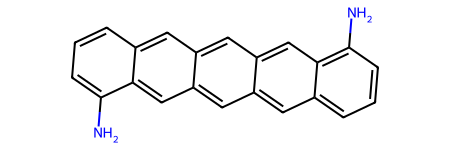

In [53]:
Chem.MolFromSmiles('[NH2]c1cccc2cc3cc4cc5c([NH2])cccc5cc4cc3cc12')

In [74]:
import numpy as np

# calculate processability score: higher LogP and 
inverse_design_dataframe['pubchem_score'] = inverse_design_dataframe["PubChem_existence"].astype(float)
    
# --- LogP score ---
# Ideal range: -0.891 to 4.9
# Use a smooth transition using a logistic-like function
def smooth_logp(x):
    center_low, center_high = -0.891, 5.94
    # smooth step using sigmoid for both boundaries
    s_low = 1 / (1 + np.exp(-5 * (x - center_low)))   # goes from 0 to 1
    s_high = 1 / (1 + np.exp(5 * (x - center_high)))  # goes from 1 to 0
    return s_low * s_high  # combine both boundaries

inverse_design_dataframe['logp_score'] = inverse_design_dataframe["LogP"].apply(smooth_logp)

# --- SAscore ---
# If value < 3.08 → good, else worse
def smooth_sa(x):
    threshold = 3.08
    return 1 / (1 + np.exp(10 * (x - threshold)))  # smooth drop after 3.08

inverse_design_dataframe['sa_score'] = inverse_design_dataframe["SAScore"].apply(smooth_sa)

# --- Final score: average of three ---
inverse_design_dataframe["Final_score"] = (inverse_design_dataframe['pubchem_score'] + inverse_design_dataframe['logp_score'] + inverse_design_dataframe['sa_score']) / 3

In [28]:
inverse_design_dataframe.query('generation <=6').sort_values('SAScore', ascending=True)

,smiles_canonical,Sequence,generation,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,...,STEI,NumRot_tail,eccentricity,disNN,formability_score,iupac_name,cid,PubChem_existence,LogP,SAScore
24,[NH3+]c1ccc2cc3cc4cc5cc([NH3+])ccc5cc4cc3cc2c1,"[6, 6, 6, 6, 11, 11]",6,5.0,0.0,1.0,2.0,0.0,1.000000,0.0,...,1.397600,1.0,13.0,0.005917,0.985304,NaN,NaN,False,5.4638,2.024218
2,[NH3+]Cc1ccc2cc3cc4cc5ccc(C[NH3+])cc5cc4cc3cc2c1,"[6, 6, 6, 6, 8]",5,5.0,0.0,1.0,2.0,2.0,0.909091,0.0,...,1.273999,2.0,14.0,0.005102,0.999994,NaN,NaN,False,5.2168,2.122427
7,[NH3+]Cc1ccc2cc3cc4cc5cc6ccc(C[NH3+])cc6cc5cc4...,"[6, 6, 6, 6, 6, 8]",6,6.0,0.0,1.0,2.0,2.0,0.923077,0.0,...,1.275200,2.0,16.0,0.003906,0.999994,NaN,NaN,False,6.3700,2.177058
0,[NH3+]Cc1ccc2cc3cc4cc5cc6cc(C[NH3+])ccc6cc5cc4...,"[6, 6, 6, 6, 6]",5,6.0,0.0,1.0,2.0,2.0,1.000000,0.0,...,1.275107,2.0,17.0,0.003460,0.999995,NaN,NaN,False,6.3700,2.177058
5,[NH3+]Cc1ccc2cc3cc4cc5cc6cc7cc(C[NH3+])ccc7cc6...,"[6, 6, 6, 6, 6, 6]",6,7.0,0.0,1.0,2.0,2.0,1.000000,0.0,...,1.275965,2.0,19.0,0.002770,0.999995,NaN,NaN,False,7.5232,2.240088
4,[NH3+]Cc1ccc2cc3cc4cc5cc([NH3+])ccc5cc4cc3cc2c1,"[6, 6, 6, 6, 11]",5,5.0,0.0,1.0,2.0,1.0,1.000000,0.0,...,1.397965,1.5,14.0,0.005102,0.999885,NaN,NaN,False,5.3403,2.304789
20,[NH3+]Cc1ccc2cc3cc4cc5ccc([NH3+])cc5cc4cc3cc2c1,"[6, 6, 6, 6, 8, 11]",6,5.0,0.0,1.0,2.0,1.0,0.909091,0.0,...,1.398179,1.5,13.0,0.005917,0.999885,NaN,NaN,False,5.3403,2.304789
12,[NH3+]Cc1ccc2c(ccc3cc4cc5cc6c(ccc7cc(C[NH3+])c...,"[6, 6, 6, 6, 6, 6]",6,7.0,0.0,1.0,2.0,2.0,1.000000,0.0,...,1.275965,2.0,19.0,0.002770,0.999995,NaN,NaN,False,7.5232,2.323322
13,[NH3+]Cc1ccc2cc3cc4cc5ccc6cc(C[NH3+])ccc6c5cc4...,"[6, 6, 6, 6, 6, 8]",6,6.0,0.0,1.0,2.0,2.0,0.923077,0.0,...,1.275573,2.0,16.0,0.003906,0.999994,NaN,NaN,False,6.3700,2.327094
1,[NH3+]Cc1ccc2cc3cc4cc5c(ccc6cc(C[NH3+])ccc65)c...,"[6, 6, 6, 6, 6]",5,6.0,0.0,1.0,2.0,2.0,1.000000,0.0,...,1.275107,2.0,17.0,0.003460,0.999995,NaN,NaN,False,6.3700,2.327094


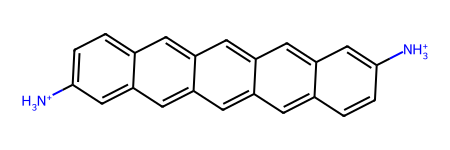

In [23]:
Chem.MolFromSmiles('[NH3+]c1ccc2cc3cc4cc5cc([NH3+])ccc5cc4cc3cc2c1')

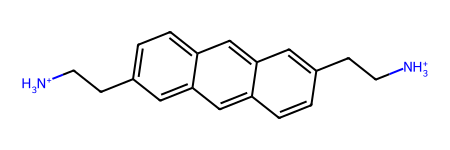

In [84]:
smiles_canonical = '[NH3+]CCc1ccc2cc3cc(CC[NH3+])ccc3cc2c1'
Chem.MolFromSmiles(smiles_canonical)

In [85]:
smiles_neutral = get_neutral_smiles(smiles_canonical)

neutral_mol = Chem.MolFromSmiles(smiles_neutral)

logP = Descriptors.MolLogP(neutral_mol)

print(logP)

2.995400000000001


In [93]:
inverse_design_dataframe[['smiles_canonical', 'LogP']]

,smiles_canonical,LogP
0,[NH3+]Cc1cc[nH+]cn1,-0.0647
1,[NH3+]Cc1cc[nH+]nc1,-0.0647
2,[NH3+]Cc1nc[nH+]s1,-0.0032
3,[NH3+]Cc1cn[nH+]s1,-0.0032
4,[NH3+]Cc1n[nH+]cs1,-0.0032
...,...,...
176,CC(C[NH3+])Cc1nnn[nH+]n1,-1.2011
177,CC(CC[NH3+])c1nnn[nH+]n1,-0.8861
178,CC([NH3+])C(C)c1nnn[nH+]n1,-0.8877
179,CC([NH3+])C(C)c1n[nH+]nc(F)n1,-0.1436


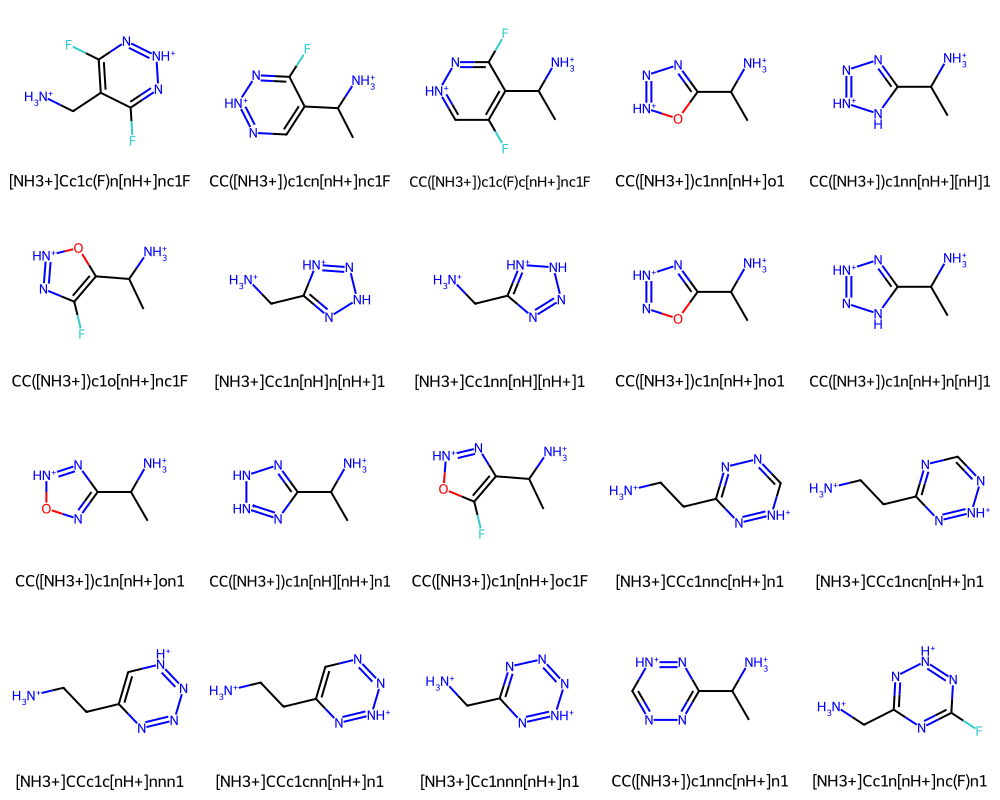

In [95]:

smiles_list = inverse_design_dataframe['smiles_canonical'].tolist()
from utils import visualize_smiles_list
visualize_smiles_list(smiles_list[100:120])

['[NH3+]c1ccc2cc3cc4cc5ccc([NH3+])cc5cc4cc3cc2c1',
 '[NH3+]c1cccc2cc3cc4cc5c([NH3+])cccc5cc4cc3cc12',
 '[NH3+]c1cccc2cc3cc4cc5cccc([NH3+])c5cc4cc3cc12',
 '[NH3+]Cc1ccc2cc3cc4cc5ccc(C[NH3+])cc5cc4cc3cc2c1',
 '[NH3+]Cc1cccc2cc3cc4cc5c(C[NH3+])cccc5cc4cc3cc12',
 '[NH3+]Cc1cccc2cc3cc4cc5cccc(C[NH3+])c5cc4cc3cc12',
 '[NH3+]Cc1ccc2cc3cc4cc5c(C[NH3+])cccc5cc4cc3cc2c1',
 '[NH3+]Cc1ccc2cc3cc4cc5cccc(C[NH3+])c5cc4cc3cc2c1',
 '[NH3+]Cc1ccc2cc3cc4cc5ccc([NH3+])cc5cc4cc3cc2c1',
 '[NH3+]Cc1ccc2cc3cc4cc5cc([NH3+])ccc5cc4cc3cc2c1',
 '[NH3+]Cc1ccc2cc3cc4cc5c([NH3+])cccc5cc4cc3cc2c1',
 '[NH3+]Cc1ccc2cc3cc4cc5cccc([NH3+])c5cc4cc3cc2c1',
 '[NH3+]Cc1cccc2cc3cc4cc5cc([NH3+])ccc5cc4cc3cc12',
 '[NH3+]Cc1cccc2cc3cc4cc5ccc([NH3+])cc5cc4cc3cc12',
 '[NH3+]Cc1cccc2cc3cc4cc5cccc([NH3+])c5cc4cc3cc12',
 '[NH3+]Cc1cccc2cc3cc4cc5c([NH3+])cccc5cc4cc3cc12',
 '[NH3+]c1ccc2cc3cc4cc5cc([NH3+])ccc5cc4cc3cc2c1',
 '[NH3+]c1ccc2cc3cc4cc5cccc([NH3+])c5cc4cc3cc2c1',
 '[NH3+]c1ccc2cc3cc4cc5c([NH3+])cccc5cc4cc3cc2c1',
 '[NH3+]Cc1cc

In [ ]:
import csv
from organic_featurization_helper import get_organic_existence, get_neutral_smiles

def generate_existence_csv_file_from_smiles(input_csv, output_csv):
    """
    Read the SMILES and sequences from an input CSV, compute the existence in pubchem,
    and write the results to an output CSV file.
    
    Parameters:
    - input_csv: Path to the input CSV containing SMILES and sequences.
    - output_csv: Path to the output CSV file where results will be saved.
    """
    with open(input_csv, 'r') as infile, open(output_csv, 'w', newline='') as outfile:
        reader = csv.DictReader(infile)
        fieldnames = ['smiles_canonical', 'smiles_neutral', 'iupac_name', 'cid']  # Add functional group names as columns
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        
        # Write the header to the output CSV
        writer.writeheader()
        
        # Process each row (SMILES and sequence) in the input CSV
        for row in reader:
            smiles_canonical = row['smiles_canonical']
            smiles_neutral = get_neutral_smiles(smiles_canonical)
            
            # Find the existence of molecule in pubchem
            organic_existence_dict = get_organic_existence(smiles_neutral)
            output_row = {
                'smiles_canonical': smiles_canonical,
            }
            output_row.update(organic_existence_dict)  # Add PubChem data to the row
                
            # Write the row to the output CSV
            writer.writerow(output_row)



In [3]:
import csv
from organic_featurization_helper import get_organic_existence, get_neutral_smiles

def generate_existence_csv_file_from_smiles(input_csv, output_csv):
    """
    Read the SMILES and sequences from an input CSV, compute the existence in pubchem,
    and write the results to an output CSV file.
    
    Parameters:
    - input_csv: Path to the input CSV containing SMILES and sequences.
    - output_csv: Path to the output CSV file where results will be saved.
    """
    # Step 1: Check what has already been written to the output CSV
    existing_smiles = set()
    with open(output_csv, 'r') as outfile:
        reader = csv.DictReader(outfile)
        # Collect all SMILES that have already been processed
        for row in reader:
            existing_smiles.add(row['smiles_canonical'])

    # Step 2: Step 2: Open input and output files and process the remaining SMILES
    with open(input_csv, 'r') as infile, open(output_csv, 'a', newline='') as outfile:
        reader = csv.DictReader(infile)
        fieldnames = ['smiles_canonical', 'smiles_neutral', 'iupac_name', 'cid']  # Add functional group names as columns
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        
        # If the file is new (i.e., no SMILES processed yet), write the header
        if not existing_smiles:
            writer.writeheader()
        
        # Process each row (SMILES and sequence) in the input CSV
        for row in reader:
            smiles_canonical = row['smiles_canonical']
            if smiles_canonical in existing_smiles:
                continue
            else:
                smiles_neutral = get_neutral_smiles(smiles_canonical)
                
                # Find the existence of molecule in pubchem
                organic_existence_dict = get_organic_existence(smiles_neutral)
                output_row = {
                    'smiles_canonical': smiles_canonical,
                }
                output_row.update(organic_existence_dict)  # Add PubChem data to the row
                
            # Write the row to the output CSV
            writer.writerow(output_row)


In [ ]:
# Iterate over all the files in the folder with generations from 0 to 4
for i in range(4,5): # (0,5) = 0,1,2,3,4
    input_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/01-molecular-generation/smiles_generation_' + str(i) + '.csv'  # Input file containing SMILES and sequences
    output_csv = PROJECT_ROOT_DIRECTORY + '01-rawdata/15-pubchem-existence/existence_generation_' + str(i) + '.csv'  # Output file to store SMILES and fingerprint vectors
    generate_existence_csv_file_from_smiles(input_csv, output_csv)
    print('Finished generation ' + str(i))


Finished iteration 4


### Bulk lookup for generation 5 and 6 molecules
- Step 1: Each lookup can do 200,000 organic molecules. save the SMILES_CANONICAL in a csv file
- Step 2: Bulk lookup through website: https://pubchem.ncbi.nlm.nih.gov/idexchange/idexchange.cgi
- Step 3: Convert the obtained file

In [36]:
from rdkit import Chem
from organic_featurization_helper import get_neutral_smiles

i = 6
df = pd.read_csv(PROJECT_ROOT_DIRECTORY + '01-rawdata/01-molecular-generation/smiles_generation_' + str(i) + '.csv' )

def canonicalize_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            return Chem.MolToSmiles(mol, canonical=True, kekuleSmiles=True)
    except:
        return None
    return None

for i in df.index:
    smiles_canonical = df.loc[i, 'smiles_canonical']
    smiles_neutral = get_neutral_smiles(smiles_canonical)
    SMILES_NEUTRAL = canonicalize_smiles(smiles_neutral)
    df.loc[i, 'smiles_neutral'] = smiles_neutral
    df.loc[i, 'SMILES_NEUTRAL'] = SMILES_NEUTRAL

df

,smiles_canonical,Sequence,smiles_neutral,SMILES_NEUTRAL
0,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc...,"[1, 4, 3, 3, 3, 3]",NCc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=...
1,[NH3+]Cc1cc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(...,"[1, 4, 3, 3, 3, 4]",NCc1cc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s6...,NCC1=CC(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=C(...
2,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6csc...,"[1, 4, 3, 3, 3, 4]",NCc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6csc(CN)c...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC(C5=CC=C(C6=CSC...
3,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc...,"[1, 4, 3, 3, 3, 5]",NCc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=...
4,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6ccc...,"[1, 4, 3, 3, 3, 5]",NCc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC(C5=CC=C(C6=CC=...
...,...,...,...,...
4446429,Cc1c(F)c(C(C)[NH3+])c(C)c(F)c1C(C)[NH3+],"[15, 15, 16, 16, 17, 17]",Cc1c(F)c(C(C)N)c(C)c(F)c1C(C)N,CC1=C(F)C(C(C)N)=C(C)C(F)=C1C(C)N
4446430,Cc1c(F)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],"[15, 15, 16, 16, 17, 17]",Cc1c(F)c(C(C)N)c(F)c(C)c1C(C)N,CC1=C(F)C(C(C)N)=C(F)C(C)=C1C(C)N
4446431,Cc1c(C)c(C(C)[NH3+])c(F)c(F)c1C(C)[NH3+],"[15, 15, 16, 16, 17, 17]",Cc1c(C)c(C(C)N)c(F)c(F)c1C(C)N,CC1=C(C)C(C(C)N)=C(F)C(F)=C1C(C)N
4446432,Cc1c(C)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],"[15, 16, 16, 17, 17, 17]",Cc1c(C)c(C(C)N)c(F)c(C)c1C(C)N,CC1=C(C)C(C(C)N)=C(F)C(C)=C1C(C)N


In [37]:
df.drop(columns=['Sequence']).to_csv('../01-rawdata/15-pubchem-existence/generation-6/generation-6-smiles-conversion.csv', index=False)

In [38]:
df = pd.read_csv('../01-rawdata/15-pubchem-existence/generation-6/generation-6-smiles-conversion.csv')
df

,smiles_canonical,smiles_neutral,SMILES_NEUTRAL
0,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=...
1,[NH3+]Cc1cc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(...,NCc1cc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s6...,NCC1=CC(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=C(...
2,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6csc...,NCc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6csc(CN)c...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC(C5=CC=C(C6=CSC...
3,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=...
4,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC(C5=CC=C(C6=CC=...
...,...,...,...
4446429,Cc1c(F)c(C(C)[NH3+])c(C)c(F)c1C(C)[NH3+],Cc1c(F)c(C(C)N)c(C)c(F)c1C(C)N,CC1=C(F)C(C(C)N)=C(C)C(F)=C1C(C)N
4446430,Cc1c(F)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],Cc1c(F)c(C(C)N)c(F)c(C)c1C(C)N,CC1=C(F)C(C(C)N)=C(F)C(C)=C1C(C)N
4446431,Cc1c(C)c(C(C)[NH3+])c(F)c(F)c1C(C)[NH3+],Cc1c(C)c(C(C)N)c(F)c(F)c1C(C)N,CC1=C(C)C(C(C)N)=C(F)C(F)=C1C(C)N
4446432,Cc1c(C)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],Cc1c(C)c(C(C)N)c(F)c(C)c1C(C)N,CC1=C(C)C(C(C)N)=C(F)C(C)=C1C(C)N


In [42]:
for i in range(0,18):
    print(i)
    start_index = i * 250000
    end_index = (i + 1) * 250000
    df_chunk = df.iloc[start_index:end_index].SMILES_NEUTRAL
    print(df_chunk.shape)
    df_chunk.to_csv('../01-rawdata/15-pubchem-existence/generation-6/generation-6-smiles-neutral-chunk-' + str(i) + '.csv', index=False,header=False)
    


0
(250000,)
1
(250000,)
2
(250000,)
3
(250000,)
4
(250000,)
5
(250000,)
6
(250000,)
7
(250000,)
8
(250000,)
9
(250000,)
10
(250000,)
11
(250000,)
12
(250000,)
13
(250000,)
14
(250000,)
15
(250000,)
16
(250000,)
17
(196434,)


In [52]:
df_1 = pd.read_csv(PROJECT_ROOT_DIRECTORY + '01-rawdata/15-pubchem-existence/generation-6/generation-6-smiles-neutral-cid.txt', sep = '\t', header=None)
df_1.columns = ['SMILES_NEUTRAL', 'cid']
df_1


,SMILES_NEUTRAL,cid
0,NCC1=CN=C(C2=CSC3=CC=CC(CN)=C23)S1,NaN
1,NCC1=CC=C(C2=NSC3=CC=CC(CN)=C23)S1,NaN
2,NCC1=CC=C(C2=CSC3=NC=CC(CN)=C23)S1,NaN
3,NCC1=CC=C(C2=CSC3=CN=CC(CN)=C23)S1,NaN
4,NCC1=CC=C(C2=CSC3=CC=NC(CN)=C23)S1,NaN
...,...,...
1246429,CC1=C(F)C(C(C)N)=C(C)C(F)=C1C(C)N,NaN
1246430,CC1=C(F)C(C(C)N)=C(F)C(C)=C1C(C)N,NaN
1246431,CC1=C(C)C(C(C)N)=C(F)C(F)=C1C(C)N,NaN
1246432,CC1=C(C)C(C(C)N)=C(F)C(C)=C1C(C)N,NaN


In [28]:
# combine the three dataframes
df_combined = pd.concat([df_1, df_2, df_3], ignore_index=True)
df_combined.columns = ['SMILES_NEUTRAL', 'cid']
# fill NaN values in 'cid' column with 'NotFound'
#df_combined['cid'] = df_combined['cid'].fillna('NotFound')

In [51]:
df

,smiles_canonical,smiles_neutral,SMILES_NEUTRAL
0,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=...
1,[NH3+]Cc1cc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(...,NCc1cc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s6...,NCC1=CC(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=C(...
2,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6csc...,NCc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6csc(CN)c...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC(C5=CC=C(C6=CSC...
3,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=...
4,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC(C5=CC=C(C6=CC=...
...,...,...,...
4446429,Cc1c(F)c(C(C)[NH3+])c(C)c(F)c1C(C)[NH3+],Cc1c(F)c(C(C)N)c(C)c(F)c1C(C)N,CC1=C(F)C(C(C)N)=C(C)C(F)=C1C(C)N
4446430,Cc1c(F)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],Cc1c(F)c(C(C)N)c(F)c(C)c1C(C)N,CC1=C(F)C(C(C)N)=C(F)C(C)=C1C(C)N
4446431,Cc1c(C)c(C(C)[NH3+])c(F)c(F)c1C(C)[NH3+],Cc1c(C)c(C(C)N)c(F)c(F)c1C(C)N,CC1=C(C)C(C(C)N)=C(F)C(F)=C1C(C)N
4446432,Cc1c(C)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],Cc1c(C)c(C(C)N)c(F)c(C)c1C(C)N,CC1=C(C)C(C(C)N)=C(F)C(C)=C1C(C)N


In [53]:
dataframe_a = pd.merge(df, df_1, on='SMILES_NEUTRAL', how='left')
dataframe_a

,smiles_canonical,smiles_neutral,SMILES_NEUTRAL,cid
0,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=...,NaN
1,[NH3+]Cc1cc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(...,NCc1cc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s6...,NCC1=CC(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=C(...,NaN
2,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6csc...,NCc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6csc(CN)c...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC(C5=CC=C(C6=CSC...,NaN
3,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=...,NaN
4,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC(C5=CC=C(C6=CC=...,NaN
...,...,...,...,...
4448657,Cc1c(F)c(C(C)[NH3+])c(C)c(F)c1C(C)[NH3+],Cc1c(F)c(C(C)N)c(C)c(F)c1C(C)N,CC1=C(F)C(C(C)N)=C(C)C(F)=C1C(C)N,NaN
4448658,Cc1c(F)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],Cc1c(F)c(C(C)N)c(F)c(C)c1C(C)N,CC1=C(F)C(C(C)N)=C(F)C(C)=C1C(C)N,NaN
4448659,Cc1c(C)c(C(C)[NH3+])c(F)c(F)c1C(C)[NH3+],Cc1c(C)c(C(C)N)c(F)c(F)c1C(C)N,CC1=C(C)C(C(C)N)=C(F)C(F)=C1C(C)N,NaN
4448660,Cc1c(C)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],Cc1c(C)c(C(C)N)c(F)c(C)c1C(C)N,CC1=C(C)C(C(C)N)=C(F)C(C)=C1C(C)N,NaN


In [54]:
dataframe_b = dataframe_a.drop_duplicates()
dataframe_b

,smiles_canonical,smiles_neutral,SMILES_NEUTRAL,cid
0,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=...,NaN
1,[NH3+]Cc1cc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(...,NCc1cc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s6...,NCC1=CC(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=C(...,NaN
2,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6csc...,NCc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6csc(CN)c...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC(C5=CC=C(C6=CSC...,NaN
3,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC=C(C5=CC(C6=CC=...,NaN
4,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6ccc(CN)s...,NCC1=CC=C(C2=CC=C(C3=CC=C(C4=CC(C5=CC=C(C6=CC=...,NaN
...,...,...,...,...
4448657,Cc1c(F)c(C(C)[NH3+])c(C)c(F)c1C(C)[NH3+],Cc1c(F)c(C(C)N)c(C)c(F)c1C(C)N,CC1=C(F)C(C(C)N)=C(C)C(F)=C1C(C)N,NaN
4448658,Cc1c(F)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],Cc1c(F)c(C(C)N)c(F)c(C)c1C(C)N,CC1=C(F)C(C(C)N)=C(F)C(C)=C1C(C)N,NaN
4448659,Cc1c(C)c(C(C)[NH3+])c(F)c(F)c1C(C)[NH3+],Cc1c(C)c(C(C)N)c(F)c(F)c1C(C)N,CC1=C(C)C(C(C)N)=C(F)C(F)=C1C(C)N,NaN
4448660,Cc1c(C)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],Cc1c(C)c(C(C)N)c(F)c(C)c1C(C)N,CC1=C(C)C(C(C)N)=C(F)C(C)=C1C(C)N,NaN


In [55]:
dataframe_b.to_csv('../01-rawdata/15-pubchem-existence/generation-6/generation-6-smiles_neutral-cid.csv', index=False)

In [56]:
dataframe_c = dataframe_b[['smiles_canonical', 'smiles_neutral', 'cid']]
dataframe_c

,smiles_canonical,smiles_neutral,cid
0,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s...,NaN
1,[NH3+]Cc1cc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(...,NCc1cc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s6...,NaN
2,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6csc...,NCc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6csc(CN)c...,NaN
3,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4ccc(-c5cc(-c6ccc(CN)s...,NaN
4,[NH3+]Cc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6ccc...,NCc1ccc(-c2ccc(-c3ccc(-c4cc(-c5ccc(-c6ccc(CN)s...,NaN
...,...,...,...
4448657,Cc1c(F)c(C(C)[NH3+])c(C)c(F)c1C(C)[NH3+],Cc1c(F)c(C(C)N)c(C)c(F)c1C(C)N,NaN
4448658,Cc1c(F)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],Cc1c(F)c(C(C)N)c(F)c(C)c1C(C)N,NaN
4448659,Cc1c(C)c(C(C)[NH3+])c(F)c(F)c1C(C)[NH3+],Cc1c(C)c(C(C)N)c(F)c(F)c1C(C)N,NaN
4448660,Cc1c(C)c(C(C)[NH3+])c(F)c(C)c1C(C)[NH3+],Cc1c(C)c(C(C)N)c(F)c(C)c1C(C)N,NaN


In [57]:
dataframe_c.to_csv('../01-rawdata/15-pubchem-existence/existence_generation_6.csv', index=False)

#### Machine learning for pubchem existence classification

In [10]:
organic_genome_path = PROJECT_ROOT_DIRECTORY+'02-metadata/06-csv-files/01-organic-genome.csv'
organic_fingerprints_dataframe_path = PROJECT_ROOT_DIRECTORY+'02-metadata/06-csv-files/02-organic-fingerprints.csv'

organic_genome_dataframe = pd.read_csv(organic_genome_path, index_col='identifier')
organic_fingerprint_dataframe = pd.read_csv(organic_fingerprints_dataframe_path, index_col='identifier')[COLUMNS_DICT['machine_learning_features']]
organic_pubchem_dataframe = pd.read_csv(PROJECT_ROOT_DIRECTORY+'02-metadata/06-csv-files/10-pubchem-existence.csv', index_col='identifier')

input_dataframe = pd.concat([organic_genome_dataframe, organic_fingerprint_dataframe,organic_pubchem_dataframe], axis=1).query('generation<=3.0')

In [20]:
input_dataframe['target'] = 0
input_dataframe.loc[input_dataframe['cid'] > 0, 'target'] = 1
input_dataframe

,smiles_canonical,generation,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,fluorination,furan,pyrrole,sidechain_on_linker,sidechain_on_backbone,PubChem_existence,smiles_neutral,iupac_name,cid,target
identifier,,,,,,,,,,,,,,,,,,,
1,[NH3+]Cc1cc2sc(C[NH3+])cc2s1,2.0,2.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,NCc1cc2sc(CN)cc2s1,NaN,NaN,0
2,[NH3+]Cc1cc2sc([NH3+])cc2s1,3.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,NCc1cc2sc(N)cc2s1,NaN,NaN,0
4,[NH3+]Cc1ccc(C[NH3+])s1,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,NCc1ccc(CN)s1,[5-(aminomethyl)thiophen-2-yl]methanamine,12979461.0,1
5,[NH3+]Cc1ccc(C[NH3+])o1,2.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,True,NCc1ccc(CN)o1,[5-(aminomethyl)furan-2-yl]methanamine,13561170.0,1
6,[NH3+]Cc1ccc(C[NH3+])[nH]1,2.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,True,NCc1ccc(CN)[nH]1,[5-(aminomethyl)-1H-pyrrol-2-yl]methanamine,17975041.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36476,CC([NH3+])c1ccc2c(F)c(C[NH3+])sc2c1,3.0,2.0,0.0,0.5,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,False,CC(N)c1ccc2c(F)c(CN)sc2c1,NaN,NaN,0
36477,CC([NH3+])c1sc2cc(C[NH3+])ccc2c1F,3.0,2.0,0.0,0.5,2.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,False,CC(N)c1sc2cc(CN)ccc2c1F,NaN,NaN,0
36478,Cc1cc2c(F)c(C[NH3+])sc2cc1C[NH3+],3.0,2.0,0.0,0.5,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,False,Cc1cc2c(F)c(CN)sc2cc1CN,NaN,NaN,0


In [12]:
# Define the models to be trained
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


models = {
    'LogisticRegression': LogisticRegression(),
    'SVC_linear': SVC(kernel='linear'),
    'LinearSVC': LinearSVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC_rbf': SVC(kernel='rbf'),
    'GaussianNB': GaussianNB(),
}


param_grids = {
    'LogisticRegression': {'model__C': [10, 5, 2, 1, 0.1]},
    'SVC_linear': {'model__C': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]},
    'LinearSVC': {'model__C': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]},
    'KNeighborsClassifier': {'model__n_neighbors': [1, 2, 3, 4, 5]},
    'DecisionTreeClassifier': {'model__max_depth': [5, 6, 7, 8, 9, 10]},
    'SVC_rbf': {'model__C': [10, 5, 2, 1, 0.1]},
    'GaussianNB': {},
}


In [13]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
random_state = 4
test_size = 0.2
identifier_list = input_dataframe.index.to_list()
train_identifier_list, test_identifier_list = train_test_split(identifier_list, random_state=random_state, test_size=test_size)
print('Data was split into train set and test set with test size: ', test_size)

train_test_split_dataframe = pd.DataFrame(index=input_dataframe.index)
for identifier in train_identifier_list:
    train_test_split_dataframe.at[identifier, 'type'] = 'train'
for identifier in test_identifier_list:
    train_test_split_dataframe.at[identifier, 'type'] = 'test'


Data was split into train set and test set with test size:  0.2


In [21]:
features = COLUMNS_DICT['machine_learning_features']
# assign the target variable in input_dataframe based on pubchem existence (column value = 0 if pubchem existnece is false, 1 if true)


target = 'target'

X = input_dataframe[features].values
y = input_dataframe[target].values

X_train = input_dataframe.loc[train_identifier_list, features].values
X_test = input_dataframe.loc[test_identifier_list, features].values
y_train = input_dataframe.loc[train_identifier_list, target].values
y_test = input_dataframe.loc[test_identifier_list, target].values


In [22]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


def train_classifier(model_name, model, param_grid):
    print ('training model ' + model_name + '...')
    # this pipeline involves standard scaler and lasso regression model
    pipeline = Pipeline([
        ("scaler", StandardScaler()), 
        ('model', model)]
    )
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5
    )
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_param = grid_search.best_params_
    print('best parameter: ', best_param)
    print('best score: ', grid_search.best_score_)
    return best_model, best_param

In [24]:
best_models = {}
for model_name, model in models.items():
    best_model, best_param = train_classifier(model_name, model, param_grids[model_name])
    best_models[model_name] = best_model

training model LogisticRegression...
best parameter:  {'model__C': 1}
best score:  0.9278312168485577
training model SVC_linear...
best parameter:  {'model__C': 1}
best score:  0.9251277702144755
training model LinearSVC...


/Users/yongxinlyu/opt/anaconda3/envs/dj-perovskite-env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/yongxinlyu/opt/anaconda3/envs/dj-perovskite-env/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yongxinlyu/opt/anaconda3/envs/dj-perovskite-env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/yongxinlyu/opt/anaconda3/envs/dj-perovskite-env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly t

best parameter:  {'model__C': 1}
best score:  0.9282165733032786
training model KNeighborsClassifier...
best parameter:  {'model__n_neighbors': 1}
best score:  0.9212600709710536
training model DecisionTreeClassifier...
best parameter:  {'model__max_depth': 9}
best score:  0.9208784341732319
training model SVC_rbf...
best parameter:  {'model__C': 10}
best score:  0.928595978306961
training model GaussianNB...
best parameter:  {}
best score:  0.8707017504705366


In [32]:
y_pred = best_models['LogisticRegression'].predict(X)
y_pred_proba = best_models['LogisticRegression'].predict_proba(X)[:,1]
y_decision_function = best_models['LogisticRegression'].decision_function(X)

# save to dataframe
output_dataframe = input_dataframe.copy()
output_dataframe['target_prediction'] = y_pred
output_dataframe['target_prediction_proba'] = y_pred_proba
output_dataframe['target_decision_function'] = y_decision_function

In [28]:
import shap

explainer = shap.Explainer(best_models['LogisticRegression'][1], 
                           best_models['LogisticRegression'][0].transform(X_train),
                           feature_names=features)

shap_values = explainer(best_models['LogisticRegression'][0].transform(X))

In [30]:
import numpy as np
base_index=input_dataframe.reset_index().query('identifier == 26').index.values[0]
print('shapley value is calibrated by base value PDMA')

base_shap_value = shap_values.values[base_index - 1]
shap_values.values = shap_values.values - base_shap_value
prediction_base = best_models['LogisticRegression'].predict([input_dataframe.loc[26,COLUMNS_DICT['machine_learning_features']].to_list()])
shap_values.base_values = np.repeat(prediction_base, len(shap_values.base_values))

shapley value is calibrated by base value PDMA


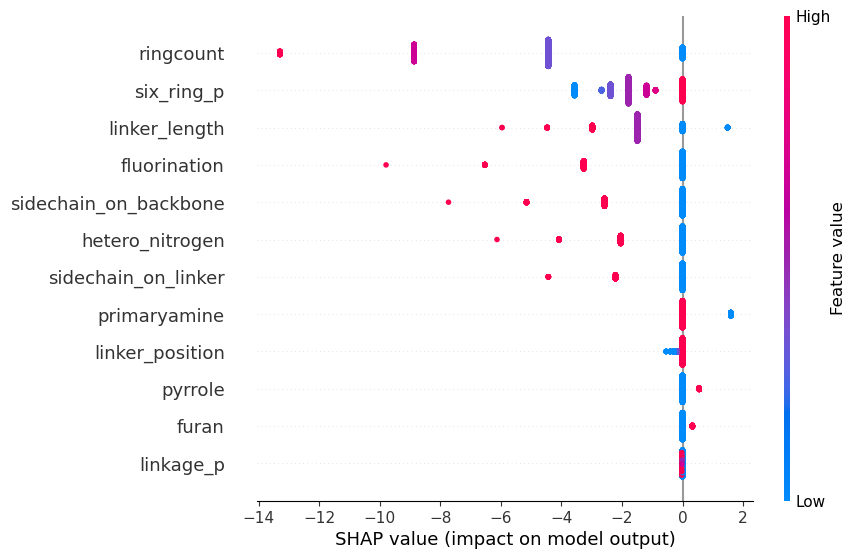

In [54]:
import matplotlib.pyplot as plt
shap.plots.beeswarm(shap_values,show=False,max_display=12,
                    #order=shap_values.max(0)
                    )
plt.savefig('../rawfigures/existence_shap_beeswarm.svg', dpi=300)

### Visualization

In [19]:
dataframe = pd.concat([organic_genome_dataframe,organic_pubchem_dataframe, prediction_dataframe], axis=1).reset_index()
train_test_dataframe = dataframe.query('generation<=3')

In [35]:
dataframe.loc[26,:]

identifier                                                 27
smiles_canonical                      [NH3+]Cc1ccc([NH3+])nc1
generation                                                2.0
smiles_neutral                                  NCc1ccc(N)nc1
iupac_name                     5-(aminomethyl)pyridin-2-amine
cid                                                15766771.0
existence                                                 1.0
existence_predicted                                       1.0
existence_predicted_proba                            0.988099
existence_decision_function                          4.419122
Name: 26, dtype: object

In [33]:
output_dataframe

,smiles_canonical,generation,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,fluorination,...,sidechain_on_linker,sidechain_on_backbone,PubChem_existence,smiles_neutral,iupac_name,cid,target,target_prediction,target_prediction_proba,target_decision_function
identifier,,,,,,,,,,,,,,,,,,,,,
1,[NH3+]Cc1cc2sc(C[NH3+])cc2s1,2.0,2.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,False,NCc1cc2sc(CN)cc2s1,NaN,NaN,0,0,0.041530,-3.138930
2,[NH3+]Cc1cc2sc([NH3+])cc2s1,3.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,False,NCc1cc2sc(N)cc2s1,NaN,NaN,0,0,0.161411,-1.647765
4,[NH3+]Cc1ccc(C[NH3+])s1,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,True,NCc1ccc(CN)s1,[5-(aminomethyl)thiophen-2-yl]methanamine,12979461.0,1,1,0.785134,1.295841
5,[NH3+]Cc1ccc(C[NH3+])o1,2.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,True,NCc1ccc(CN)o1,[5-(aminomethyl)furan-2-yl]methanamine,13561170.0,1,1,0.834863,1.620491
6,[NH3+]Cc1ccc(C[NH3+])[nH]1,2.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,True,NCc1ccc(CN)[nH]1,[5-(aminomethyl)-1H-pyrrol-2-yl]methanamine,17975041.0,1,1,0.863634,1.845805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36476,CC([NH3+])c1ccc2c(F)c(C[NH3+])sc2c1,3.0,2.0,0.0,0.5,2.0,2.0,1.0,0.0,1.0,...,1.0,0.0,False,CC(N)c1ccc2c(F)c(CN)sc2c1,NaN,NaN,0,0,0.001071,-6.837780
36477,CC([NH3+])c1sc2cc(C[NH3+])ccc2c1F,3.0,2.0,0.0,0.5,2.0,2.0,1.0,0.0,1.0,...,1.0,0.0,False,CC(N)c1sc2cc(CN)ccc2c1F,NaN,NaN,0,0,0.001071,-6.837780
36478,Cc1cc2c(F)c(C[NH3+])sc2cc1C[NH3+],3.0,2.0,0.0,0.5,2.0,2.0,1.0,0.0,1.0,...,0.0,1.0,False,Cc1cc2c(F)c(CN)sc2cc1CN,NaN,NaN,0,0,0.000747,-7.198503


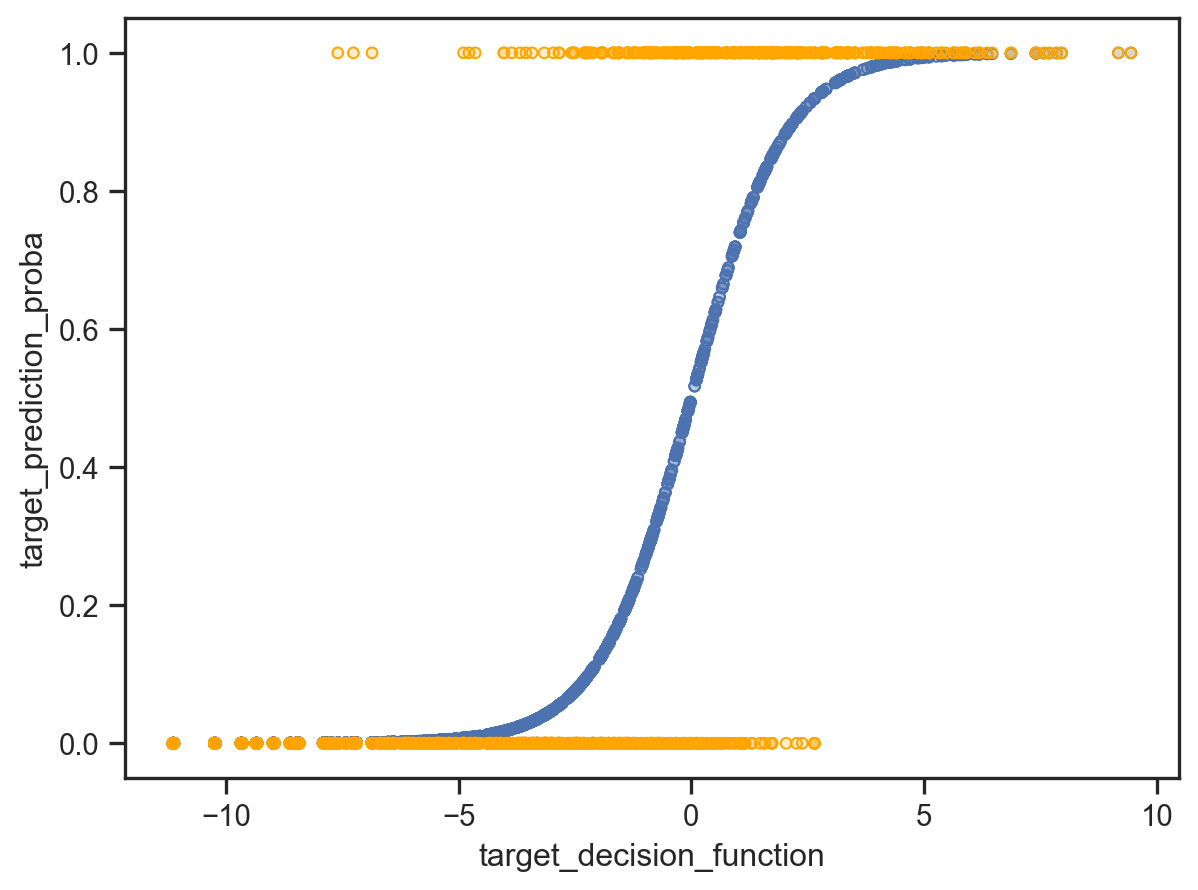

In [40]:
import seaborn.objects as so
from seaborn import axes_style

(
    so.Plot(output_dataframe, y='target_prediction_proba', x='target_decision_function')
    .add(so.Dots())
    .add(so.Dots(color='orange'), y='target')
    .theme(axes_style('ticks'))
)

In [32]:
import plotly.express as px
fig = px.scatter(
    pd.melt(dataframe.query('generation<=3'), id_vars=['identifier','existence_decision_function'],value_vars=['existence_predicted_proba','existence']), 
    x="existence_decision_function", y="value",color='variable',
    hover_data={'identifier': True})
fig.show()

/Users/yongxinlyu/opt/anaconda3/envs/dj-perovskite-env/lib/python3.12/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [42]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


#y_train_test_prediction = train_test_dataframe.loc[:,'target_prediction'].values
#y_train_test_proba_prediction = train_test_dataframe.loc[:, 'target_prediction_proba'].values
cnf_matrix = confusion_matrix(y_true=y, y_pred=y_pred)

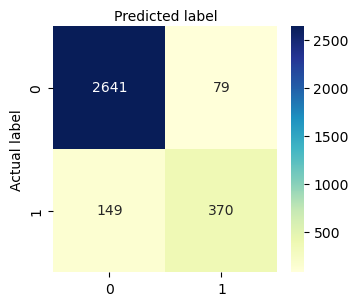

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(3.5, 3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig('../rawfigures/existence_confusion_matrix.svg', dpi=300)

In [44]:
target_names = ['No', 'Yes']
print(classification_report(y, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.95      0.97      0.96      2720
         Yes       0.82      0.71      0.76       519

    accuracy                           0.93      3239
   macro avg       0.89      0.84      0.86      3239
weighted avg       0.93      0.93      0.93      3239



AUC:  0.9635912529751784


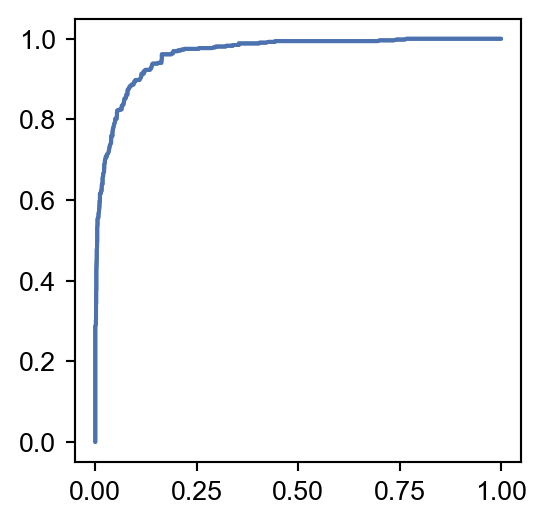

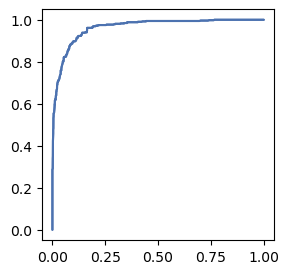

In [59]:
fpr, tpr, _ = roc_curve(y,  y_pred_proba)
auc = roc_auc_score(y, y_pred_proba)
print('AUC: ', auc)
fig, ax = plt.subplots(figsize=(3,3))

(
    so.Plot(x=fpr, y=tpr)
    .add(so.Line())
    .theme(axes_style('ticks'))
    .on(ax)
    .save('../rawfigures/existence_roc_curve.svg')
)
